<br>
# **딥 러닝의 정석**
1. 머신러닝의 기본에서 부터 차근 차근 개념들과 내용을 다루고 있는데
1. 문장이 길고 만연체 형태에다가, 한 번에 이해가 어렵게 쓰여짐
1. 내용적인 측면에서는 전반적인 내용을 살펴보기에 좋지만 전부 지불하고 사용하기엔 약간 의문이 남음
1. 책은 좋고 원서를 이해하기에 좋다면 추천하지만, 번역본은 꼭 읽어보고 사는걸 추천

###### ===================================================================
<br>
### 작가의 중간 Note...!! (목요일 진행중 기록)
진행 Process
1. 파이선 자연어 책 기본이론
1. 3분 딥러닝 텐서플로
1. 파이썬으로 머신러닝 딥러닝
이들의 공통분모를 사용해서 기본틀을 완성하여 Rough Cut을 완성하기
#### 파이썬 자연어 신간을 추후 지속적으로 추가 보완해서 완성도 높여가자!!!
###### ===================================================================

<br>
# **딥 러닝의 정석**
자연어 부분 정리하기
1. 이미지 RNN 분석등은 이 등과 달리 고정된 동일한 크기의 데이터를 학습하여 모델을 만든다
1. 반면 Sentence 와 같이 서로다른 길이의 문장분석은, 0 Padding을 활용하고
1. 또한 Sequence 와 같이 순차적인 작업에 대한 설계에서로 RNN, LSTM의 모델을 활용한다

딥러닝의 정석 모델의 기본이론들 정리
### 로지스틱 회귀이론 모델정의 방법
1. 모델을 추론하여 미리 정의한다
1. 오차함수 (엔트로피 손실) 를 계산하여 모델을 조절하는 방법을 정의한다
1. 이들을 바당으로 파타미터 경사계산 모델을 반복하여 학습한다
1. 완성된 모델의 효용성을 평가한다
1. feed back

<br>
### 미니배치 경사하강법의 한계을 극복하기
1. 경사를 어디에서 타느냐에 따라 최저점을 다르게 인식하는 문제가 발생 (지역 최솟값에 제한된다)
1. Adam 최적화 도구를 사용하여, 반복 확장수행을 한다 

### 합성곱 신경망
1. CNN 신경망 기본구조 익히기
1. 대량의 레이블의 데이터를 학습하므로, 개별 레이어중 데이터가 희소한 경우가 발생


<br>
# **Chapter 6 임베딩과 표상학습**

### 임베딩의 개념
1. 복잡한 원시 데이터(raw data)를 컴퓨터가 학습을 통해서 생성한(computer-generated) 축소된 숫자값의 목록

### 임베딩(학습 데이터 생성)과 표상학습
1. **PCA** : 차원의 저주를 극복하기 위해 기본 데이터를 압축하는 방법으로써 활용
1. **One-hot Encoding** : 개별 Factor 간의 구별은 가능하지만, 의미적 유사도를 알기는 어렵다
1. **Word2Vec** : Mikolov가 고안한 데이터 생성방법
    1. Continuous Bag of Word : 전체 문맥의 어휘들로 요소를 만들고, 목표인 Target을 예측하기 위해 모델을 생성한다
    1. Skip Gram : 사용자가 원하는 target 데이터를 추측하고, 이를 기초로 문맥의 요소들을 예측한다

In [18]:
# Skip Gram 모델 세부데이터
# 문장을 3 Gram으로 나누어서 문장요소를 구분한다
a = "the boy want to the bank"
texts = a.split(' ')
result = [[(texts[i],texts[i+1]), texts[i+2]]  for i in range(len(texts)-2)]
result

[[('the', 'boy'), 'want'],
 [('boy', 'want'), 'to'],
 [('want', 'to'), 'the'],
 [('to', 'the'), 'bank']]

### Skip Gram 자연어 모델링
1. 문장의 학습
1. 출력된 결과를 보면 [(문맥1, 문맥1), Target] 의 순서로, 각 문장의 요소들을 분리한다
1. 이를 바탕으로 모델을 학습하고 결과를 예측한다

<br>
### 문장의 예측
1. 문장을 예측할 때에는 [입력, 출력] 의 형태로 데이터를 나눈다
1. 입력 : Target 에 대응
1. 출력 : 문맥1, 문맥2 중 가장 확률이 높은 대상을 선택하여 출력한다

### 자연어 학습 Process
1. **CBOW** : 단어(Input) --> Encoder --> Embading 모델의 생성 --> Decoder --> 문맥(Target)
1. **Skip Gram** : 문맥(input) --> Encoder --> Embading 모델을 생성 --> Decoder --> 단어(Target)

### Encoder
1. 입력단어의 색을을 통해서 Look up Table을 생성한다
1. 개별 데이터는 One-hot Encoding 으로 데이터를 저장한다

### Decoder
1. 출력용 One-hot Encoding 데이터를 재구성하는 시도를 한다
1. 기본적인 모델에서는 전방향에서 One-hot Encoding의 재구성을 비교하여 Cost를 계산한다

<img src="./data/photo/biregression.png" align='left' width='500'>

In [23]:
import tensorflow as tf
# tf.nn.embedding_lookup()

### 임베딩 모델의 한계
1. 임베딩 행렬과, Lookup 테이들의 샘플 데이터는 동일한 크기의 tensor를 가져야 한다
1. 모든 어휘공간을 대상으로 확률분포를 계산하기 때문에 비효율 성이 높다
1. 이를 극복하기 위해 공인된 머신러닝 방식은 아니지만, 선형대수를 활용한 Word2Vec 모델을 사용한다

### Skip Gram

In [1]:
from data import input_word_data as data
import numpy as np
import tensorflow as tf

Found and verified text8.zip
Data size 17005207
Most common words (+UNK) [['UNK', 1737307], ('the', 1061396), ('of', 593677), ('and', 416629), ('one', 411764)]
Sample data [5234, 3081, 12, 6, 195, 2, 3134, 46, 59, 156] ['anarchism', 'originated', 'as', 'a', 'term', 'of', 'abuse', 'first', 'used', 'against']
3081 originated -> 5234 anarchism
3081 originated -> 12 as
12 as -> 3081 originated
12 as -> 6 a
6 a -> 195 term
6 a -> 12 as
195 term -> 2 of
195 term -> 6 a


In [2]:
# TRAINING PARAMETERS
batch_size = 32                                             # Number of training examples per batch
embedding_size = 128                                        # Dimension of embedding vectors
skip_window = 5                                             # Window size for context to the left and right of target
num_skips = 4                                               # How many times to reuse target to generate a label for context.
batches_per_epoch = data.data_size*num_skips/batch_size     # Number of batches per epoch of training
training_epochs = 5                                         # Number of epochs to utilize for training
neg_size = 64                                               # Number of negative samples to use for NCE
display_step = 2000                                         # Frequency with which to print statistics
val_step = 10000                                            # Frequency with which to perform validation
learning_rate = 0.1                                         # Learning rate for SGD
"Epochs: %d, Batches per epoch: %d, Examples per batch: %d" % (training_epochs, batches_per_epoch, batch_size)

'Epochs: 5, Batches per epoch: 2125650, Examples per batch: 32'

In [3]:
# NEAREST NEIGHBORS VALIDATION PARAMETERS
val_size = 20
val_dist_span = 500
val_examples = np.random.choice(val_dist_span, val_size, replace=False)
top_match = 8
plot_num = 500

In [4]:
def embedding_layer(x, embedding_shape):
    with tf.variable_scope("embedding"):
        embedding_init   = tf.random_uniform(embedding_shape, -1.0, 1.0)
        embedding_matrix = tf.get_variable("E", initializer = embedding_init)
        return tf.nn.embedding_lookup(embedding_matrix, x), embedding_matrix

In [5]:
def noise_contrastive_loss(embedding_lookup, weight_shape, bias_shape, y):
    with tf.variable_scope("nce"):
        nce_weight_init = tf.truncated_normal(weight_shape, stddev = 1.0/(weight_shape[1])**0.5)
        nce_bias_init   = tf.zeros(bias_shape)
        nce_W = tf.get_variable("W", initializer = nce_weight_init)
        nce_b = tf.get_variable("b", initializer = nce_bias_init)
        # https://stackoverflow.com/questions/45900122/typeerror-input-b-of-matmul-op-has-type-float32-that-does-not-match-type-in?rq=1
        # total_loss = tf.nn.nce_loss(nce_W, nce_b, embedding_lookup, y, neg_size, data.vocabulary_size)
        total_loss = tf.nn.nce_loss(nce_W, nce_b, y, embedding_lookup, neg_size, data.vocabulary_size)
        return tf.reduce_mean(total_loss)

In [6]:
def training(cost, global_step):
    with tf.variable_scope("training"):
        # summary_op = tf.scalar_summary("cost", cost)
        summary_op = tf.summary.scalar("cost", cost)
        optimizer  = tf.train.GradientDescentOptimizer(learning_rate)
        train_op   = optimizer.minimize(cost, global_step=global_step)
        return train_op, summary_op

In [7]:
def validation(embedding_matrix, x_val):
    norm              = tf.reduce_sum(embedding_matrix**2, 1, keep_dims=True)**0.5
    normalized        = embedding_matrix / norm
    val_embeddings    = tf.nn.embedding_lookup(normalized, x_val)
    cosine_similarity = tf.matmul(val_embeddings, normalized, transpose_b=True)
    return normalized, cosine_similarity

In [8]:
with tf.Graph().as_default():
    with tf.variable_scope("skipgram_model"):
        x   = tf.placeholder(tf.int32, shape=[batch_size])
        y   = tf.placeholder(tf.int32, [batch_size, 1])
        val = tf.constant(val_examples, dtype = tf.int32)
        global_step          = tf.Variable(0, name = 'global_step', trainable = False)
        e_lookup, e_matrix   = embedding_layer(x, [data.vocabulary_size, embedding_size])
        cost                 = noise_contrastive_loss(e_lookup, 
                                                      [data.vocabulary_size, embedding_size], 
                                                      [data.vocabulary_size], y)
        train_op, summary_op = training(cost, global_step)
        val_op               = validation(e_matrix, val)
        sess                 = tf.Session()
        # train_writer = tf.train.SummaryWriter("skipgram_logs/", graph=sess.graph)
        train_writer = tf.summary.FileWriter("skipgram_logs/", graph=sess.graph)
        init_op      = tf.initialize_all_variables()
        sess.run(init_op)
        step, avg_cost  = 0, 0

        for epoch in range(training_epochs):
            for minibatch in range(int(batches_per_epoch / 100)):
                step += 1
                minibatch_x, minibatch_y = data.generate_batch(batch_size, num_skips, skip_window)
                feed_dict = {x : minibatch_x, y : minibatch_y}
                _, new_cost, train_summary = sess.run([train_op, cost, summary_op], feed_dict=feed_dict)
                train_writer.add_summary(train_summary, sess.run(global_step))
                # Compute average loss
                avg_cost += new_cost/display_step
                
                if step % display_step == 0:
                    print ("Elapsed:", str(step), "batches. Cost =", "{:.9f}".format(avg_cost))
                    avg_cost = 0

                if step % val_step == 0:
                    _, similarity = sess.run(val_op)

                    for i in range(val_size):
                        val_word = data.reverse_dictionary[val_examples[i]]
                        neighbors = (-similarity[i, :]).argsort()[1:top_match+1]
                        print_str = "Nearest neighbor of %s:" % val_word

                        for k in range(top_match):
                            print_str += " %s," % data.reverse_dictionary[neighbors[k]]
                        print (print_str[:-1])
                        
        final_embeddings, _ = sess.run(val_op)
print('Learning is Done...!!')

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use `tf.global_variables_initializer` instead.
Elapsed: 2000 batches. Cost = 100.593107678
Elapsed: 4000 batches. Cost = 43.182460289
Elapsed: 6000 batches. Cost = 31.805928658
Elapsed: 8000 batches. Cost = 23.531335224
Elapsed: 10000 batches. Cost = 19.301209028
Nearest neighbor of back: only, not, or, algeria, list, robert, can, during
Nearest neighbor of case: it, by, autism, these, were, known, between, this
Nearest neighbor of place: more, population, later, but, states, it, even, church
Nearest neighbor of al: eight, three, lincoln, what, states, human, people, but
Nearest neighbor of official: area, some, time, his, lincoln, western, well, values
Nearest neighbor of year: national, eight, state, alkanes, he, anchorage, others, his
Nearest neighbor of home: her, lincoln, more, information, it, with, writing, won
Nearest neighbor of among: or, from, algeria, autism, nine, each, not,

Elapsed: 42000 batches. Cost = 6.316455856
Elapsed: 44000 batches. Cost = 6.331803376
Elapsed: 46000 batches. Cost = 6.197193254
Elapsed: 48000 batches. Cost = 5.899749860
Elapsed: 50000 batches. Cost = 5.864996041
Nearest neighbor of back: unable, introduction, algeria, flow, recently, generated, wanted, robert
Nearest neighbor of case: autism, armenian, heat, movie, country, psychological, isbn, reversed
Nearest neighbor of place: population, colonies, limit, alkanes, lincoln, later, abu, alchemy
Nearest neighbor of al: lincoln, kick, human, members, silver, eight, what, seen
Nearest neighbor of official: area, lincoln, centered, whom, values, produced, above, northern
Nearest neighbor of year: agave, alkanes, anchorage, UNK, hearing, events, national, fail
Nearest neighbor of home: lincoln, failure, her, UNK, writing, fictional, won, information
Nearest neighbor of among: algeria, autism, re, period, ansi, each, hours, UNK
Nearest neighbor of british: conquest, animals, have, museum

Elapsed: 82000 batches. Cost = 5.238559468
Elapsed: 84000 batches. Cost = 5.218756593
Elapsed: 86000 batches. Cost = 5.181428420
Elapsed: 88000 batches. Cost = 5.166580989
Elapsed: 90000 batches. Cost = 5.193578518
Nearest neighbor of back: unable, generated, introduction, wanted, flow, defeating, recently, practice
Nearest neighbor of case: autism, reversed, heat, armenian, movie, psychological, fair, diminished
Nearest neighbor of place: colonies, population, limit, mongol, aphrodite, alkanes, materials, choose
Nearest neighbor of al: kick, silver, lincoln, UNK, members, eight, miss, displays
Nearest neighbor of official: centered, whom, area, values, produced, lincoln, discussed, transport
Nearest neighbor of year: agave, UNK, alkanes, fail, hearing, anchorage, events, national
Nearest neighbor of home: lincoln, UNK, failure, the, and, fictional, writing, sovereignty
Nearest neighbor of among: algeria, re, ansi, UNK, autism, strange, chains, hours
Nearest neighbor of british: conque

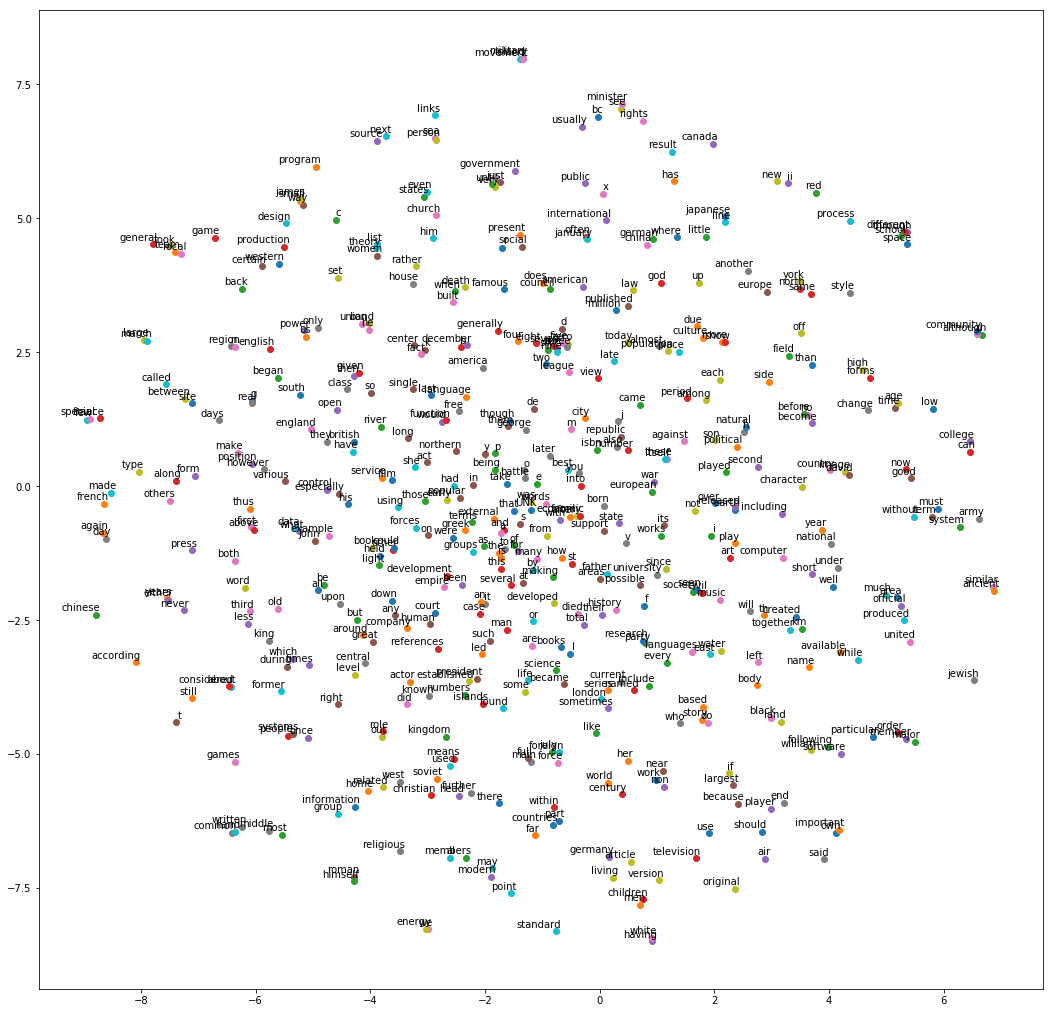

In [9]:
from sklearn.manifold import TSNE
plot_only       = 500
tsne            = TSNE(perplexity = 30, n_components = 2, init = 'pca', n_iter = 5000)
plot_embeddings = np.asfarray(final_embeddings[:plot_num,:], dtype='float')
low_dim_embs    = tsne.fit_transform(plot_embeddings)
labels          = [data.reverse_dictionary[i] for i in range(plot_only)]
data.plot_with_labels(low_dim_embs, labels)

<br>
# **Chapter 7**

<br>
## 기본의 문제점
1. 퍼셉트론 신경망의 패딩데이터는 작은 데이터에는 학습이 잘 진행되지만, 초과하는 모델에는 문제가 생긴다
1 
<br>
## **신경망**을 활용하여 **N-gram으로 seq2seq** 해결하기
1. 품사 신경망 구조를 활용
1. Text에 품사 태깅하기
1. 고정길이 부분 sequence를 사용하여 각 품사 tag를 하나씩 예측 가능하다
1. 모델의 파라미터를 줄이는 방법으로 단어벌 임베딩 전략을 사용하여 압축된 단어들의 표현을 활용 가능하다

<br>
## **품사 tagger** 구현하기
1. 3-gram 문맥 윈도우를 사용
1. 크기가 900인 300차원의 단어 임베팅사용을 활용
1. 512, 256 Hidden Layer 
1. 출력층은 44개의 태그공간에 확률분포를 계산한 Soft-Max를 사용한다
1. 최적화 알고리즘으로는 Adam을 사용하고 
1. 전체 1000 epoch를 학습하여, batch 정규화로 결과를 정형화 한다

In [14]:
import numpy as np
import gensim, leveldb, os, re

db = None
tags_to_index = {}
index_to_tags = {}
train_dataset_raw = {}
train_dataset = []
test_dataset_raw = {}
test_dataset = []
dataset_vocab = {}

print ("LOADING PRETRAINED WORD2VEC MODEL... ")
if not os.path.isdir("data/word2vecdb"):
    # model = gensim.models.Word2Vec.load_word2vec_format('./data/GoogleNews-vectors-negative300.bin', binary=True)
    model = gensim.models.KeyedVectors.load_word2vec_format('./data/GoogleNews-vectors-negative300.bin', binary=True)
    db = leveldb.LevelDB("data/word2vecdb")
print ("LOADING IS DONE. ")

LOADING PRETRAINED WORD2VEC MODEL... 


In [1]:
from gensim.models import Word2Vec

In [ ]:
# https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit
# 1.5GB 파일을 다운받은 뒤 모델을 만들면 실행에 1시간 정도가 소요된다
# 이를 극복하기 위한 경량 모델을 사용하기로 한다
# model = Word2Vec.load_word2vec_format('./data/GoogleNews-vectors-negative300.bin', binary=True)

In [15]:
# Train 학습 데이터를 불러온다
with open("data/pos.train.txt") as f:
    train_dataset_raw = f.readlines() # 빈 객체
    train_dataset_raw = [ element.split() 
                          for element in train_dataset_raw 
                          if len(element.split()) > 0 ]

train_dataset_raw[:5]

[['Confidence', 'NN', 'B-NP'],
 ['in', 'IN', 'B-PP'],
 ['the', 'DT', 'B-NP'],
 ['pound', 'NN', 'I-NP'],
 ['is', 'VBZ', 'B-VP']]

In [16]:
# Gensim 에서 학습을 위해 데이터  전처리 작업
import re
counter = 0
while counter < len(train_dataset_raw):
    pair = train_dataset_raw[counter]
    if counter < len(train_dataset_raw) - 1:
        next_pair = train_dataset_raw[counter + 1]
        if (pair[0] + "_" + next_pair[0] in model) and (pair[1] == next_pair[1]):
            train_dataset.append([pair[0] + "_" + next_pair[0], pair[1]])
            counter += 2
            continue

    word = re.sub("\d", "#", pair[0]) # 숫자 데이터는 '#'로 변환한다
    word = re.sub("-", "_", word)     # '_' 데이터는 '-'로 변환한다

    if word in model:
        train_dataset.append([word, pair[1]])
        counter += 1
        continue

    if "_" in word:
        subwords = word.split("_")
        for subword in subwords:
            if not (subword.isspace() or len(subword) == 0):
                train_dataset.append([subword, pair[1]])
        counter += 1
        continue

    train_dataset.append([word, pair[1]])
    counter += 1

In [17]:
# 전처리 결과를 저장한다
with open('data/pos.train.processed.txt', 'w') as train_file:
    for item in train_dataset:
        train_file.write("%s\n" % (item[0] + " " + item[1]))

In [18]:
# Test 데이터를 불러온다
with open("data/pos.test.txt") as f:
    test_dataset_raw = f.readlines()
    test_dataset_raw = [ element.split() 
                        for element in test_dataset_raw 
                        if len(element.split()) > 0 ]

In [19]:
counter = 0
while counter < len(test_dataset_raw):
    pair = test_dataset_raw[counter]
    if counter < len(test_dataset_raw) - 1:
        next_pair = test_dataset_raw[counter + 1]
        if (pair[0] + "_" + next_pair[0] in model) and (pair[1] == next_pair[1]):
            test_dataset.append([pair[0] + "_" + next_pair[0], pair[1]])
            counter += 2
            continue

    word = re.sub("\d", "#", pair[0])
    word = re.sub("-", "_", word)

    if word in model:
        test_dataset.append([word, pair[1]])
        counter += 1
        continue

    if "_" in word:
        subwords = word.split("_")
        for subword in subwords:
            if not (subword.isspace() or len(subword) == 0):
                test_dataset.append([subword, pair[1]])
        counter += 1
        continue

    test_dataset.append([word, pair[1]])
    counter += 1

In [20]:
with open('data/pos.test.processed.txt', 'w') as test_file:
    for item in test_dataset:
        test_file.write("%s\n" % (item[0] + " " + item[1]))

In [22]:
counter = 0
for pair in train_dataset + test_dataset:
    dataset_vocab[pair[0]] = 1
    if pair[1] not in tags_to_index:
        tags_to_index[pair[1]] = counter
        index_to_tags[counter] = pair[1]
        counter += 1

nonmodel_cache = {}
counter = 1
total = len(dataset_vocab.keys())
for word in dataset_vocab:
    if counter % 100 == 0:
        print ("Inserted %d words out of %d total" % (counter, total))
    if word in model:
        db.Put(word, model[word])
    elif word in nonmodel_cache:
        db.Put(word, nonmodel_cache[word])
    else:
        print (word)
        nonmodel_cache[word] = np.random.uniform(-0.25, 0.25, 300).astype(np.float32)
        db.Put(word, nonmodel_cache[word])
    counter += 1

TypeError: a bytes-like object is required, not 'str'

In [1]:
db = leveldb.LevelDB("data/word2vecdb")

with open("data/pos_data/pos.train.processed.txt") as f:
    train_dataset = f.readlines()
    train_dataset = [element.split() for element in train_dataset if len(element.split()) > 0]

with open("data/pos_data/pos.test.processed.txt") as f:
    test_dataset = f.readlines()
    test_dataset = [element.split() for element in test_dataset if len(element.split()) > 0]

counter = 0
for pair in train_dataset + test_dataset:
    dataset_vocab[pair[0]] = 1
    if pair[1] not in tags_to_index:
        tags_to_index[pair[1]] = counter
        index_to_tags[counter] = pair[1]
        counter += 1

class POSDataset():
    def __init__(self, db, dataset, tags_to_index, get_all=False):
        self.db = db
        self.inputs = []
        self.tags = []
        self.ptr = 0
        self.n = 0
        self.get_all = get_all

        for pair in dataset:
            self.inputs.append(np.fromstring(db.Get(pair[0]), dtype=np.float32))
            self.tags.append(tags_to_index[pair[1]])

        self.inputs = np.array(self.inputs, dtype=np.float32)
        self.tags = np.eye(len(tags_to_index.keys()))[self.tags]

    def prepare_n_gram(self, n):
        self.n = n

    def minibatch(self, size):
        batch_inputs = []
        batch_tags = []
        if self.get_all:
            counter = 0
            while counter < len(self.inputs) - self.n + 1:
                batch_inputs.append(self.inputs[counter:counter+self.n].flatten())
                batch_tags.append(self.tags[counter + self.n - 1])
                counter += 1
        elif self.ptr + size < len(self.inputs) - self.n:
            counter = self.ptr
            while counter < self.ptr + size:
                batch_inputs.append(self.inputs[counter:counter+self.n].flatten())
                batch_tags.append(self.tags[counter + self.n - 1])
                counter += 1
        else:
            counter = self.ptr
            while counter < len(self.inputs) - self.n + 1:
                batch_inputs.append(self.inputs[counter:counter+self.n].flatten())
                batch_tags.append(self.tags[counter + self.n - 1])
                counter += 1

            counter2 = 0
            while counter2 < size - counter + self.ptr:
                batch_inputs.append(self.inputs[counter2:counter2+self.n].flatten())
                batch_tags.append(self.tags[counter2 + self.n - 1])
                counter2 += 1

        self.ptr = (self.ptr + size) % (len(self.inputs) - self.n)
        return np.array(batch_inputs, dtype=np.float32), np.array(batch_tags)
    
    train = POSDataset(db, train_dataset, tags_to_index)
    test  = POSDataset(db, test_dataset, tags_to_index, get_all=True)

NameError: name 'leveldb' is not defined

<br>
# **전방향 신경망**
**이전층의 출력**이 **현재층의 입력**으로 연결된 **신경망**을 의미한다

<br>
# **순환 신경망**
**이전층의 모든 뉴런에서 나오는 입력연결**과 **현재층의 입력**으로 연결된 **신경망**을 의미한다